# 训练循环

In [2]:
!wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

--2025-12-07 20:38:47--  https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘input.txt.1’

input.txt.1         100%[===================>]   1.06M  1.03MB/s    in 1.0s    

2025-12-07 20:38:49 (1.03 MB/s) - ‘input.txt.1’ saved [1115394/1115394]



In [3]:
with open('input.txt', 'r', encoding='utf-8') as f:
    text = f.read()

In [4]:
print("length of dataset in characters:", len(text))

length of dataset in characters: 1115394


In [5]:
print(text[:1000])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we'll have corn at our own price.
Is't a verdict?

All:
No more talking on't; let it be done: away, away!

Second Citizen:
One word, good citizens.

First Citizen:
We are accounted poor citizens, the patricians good.
What authority surfeits on would relieve us: if they
would yield us but the superfluity, while it were
wholesome, we might guess they relieved us humanely;
but they think we are too dear: the leanness that
afflicts us, the object of our misery, is as an
inventory to particularise their abundance; our
sufferance is a gain to them Let us revenge this with
our pikes, ere we become rakes: for the gods know I
speak this in hunger for bread, not in thirst for revenge.



In [6]:
chars = sorted(list(set(text)))
vocab_size = len(chars)
print(''.join(chars))
print(vocab_size)


 !$&',-.3:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz
65


In [7]:
# 这里，我们为字符集中的每个字符分配一个唯一的数字ID
stoi = { ch:i for i,ch in enumerate(chars)}    # 字符到索引（string to index）的映射
itos = { i:ch for i,ch in enumerate(chars)}    # 索引到字符（index to string）的映射

# 定义一个编码函数，将字符串转换为数字ID序列，方便神经网络处理
encodec = lambda s: [stoi[c] for c in s]
decode = lambda l: ''.join([itos[i] for i in l])

print(encodec("hello"))
print(decode(encodec("hello")))

[46, 43, 50, 50, 53]
hello


In [8]:
import torch
data = torch.tensor(encodec(text), dtype=torch.long)

print(data.shape, data.dtype)
print(data[:1000])


torch.Size([1115394]) torch.int64
tensor([18, 47, 56, 57, 58,  1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 14, 43, 44,
        53, 56, 43,  1, 61, 43,  1, 54, 56, 53, 41, 43, 43, 42,  1, 39, 52, 63,
         1, 44, 59, 56, 58, 46, 43, 56,  6,  1, 46, 43, 39, 56,  1, 51, 43,  1,
        57, 54, 43, 39, 49,  8,  0,  0, 13, 50, 50, 10,  0, 31, 54, 43, 39, 49,
         6,  1, 57, 54, 43, 39, 49,  8,  0,  0, 18, 47, 56, 57, 58,  1, 15, 47,
        58, 47, 64, 43, 52, 10,  0, 37, 53, 59,  1, 39, 56, 43,  1, 39, 50, 50,
         1, 56, 43, 57, 53, 50, 60, 43, 42,  1, 56, 39, 58, 46, 43, 56,  1, 58,
        53,  1, 42, 47, 43,  1, 58, 46, 39, 52,  1, 58, 53,  1, 44, 39, 51, 47,
        57, 46, 12,  0,  0, 13, 50, 50, 10,  0, 30, 43, 57, 53, 50, 60, 43, 42,
         8,  1, 56, 43, 57, 53, 50, 60, 43, 42,  8,  0,  0, 18, 47, 56, 57, 58,
         1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 18, 47, 56, 57, 58,  6,  1, 63,
        53, 59,  1, 49, 52, 53, 61,  1, 15, 39, 47, 59, 57,  1, 25, 39, 56, 41,
      

In [9]:
n = int(0.9 * len(data))
train_data = data[:n]
test_data = data[n:]

In [10]:
block_size = 8
train_data[:block_size+1]

tensor([18, 47, 56, 57, 58,  1, 15, 47, 58])

In [11]:
x = train_data[:block_size]
y = train_data[1:block_size+1]
for t in range(block_size):
    context = x[:t+1]
    target = y[t]
    print(f"when input is {context} the target is {target}")

when input is tensor([18]) the target is 47
when input is tensor([18, 47]) the target is 56
when input is tensor([18, 47, 56]) the target is 57
when input is tensor([18, 47, 56, 57]) the target is 58
when input is tensor([18, 47, 56, 57, 58]) the target is 1
when input is tensor([18, 47, 56, 57, 58,  1]) the target is 15
when input is tensor([18, 47, 56, 57, 58,  1, 15]) the target is 47
when input is tensor([18, 47, 56, 57, 58,  1, 15, 47]) the target is 58


In [12]:
torch.manual_seed(1337)
batch_size = 4
block_size = 8

def get_batch(split):
    data = train_data if split == 'train' else test_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    return x, y

xb, yb = get_batch('train')
print(xb.shape, '\n', yb.shape)

for b in range(batch_size):
    for t in range(block_size):
        context = xb[b, :t+1]
        target = yb[b, t]
        print(f"when input is {context} the target is {target}")


torch.Size([4, 8]) 
 torch.Size([4, 8])
when input is tensor([24]) the target is 43
when input is tensor([24, 43]) the target is 58
when input is tensor([24, 43, 58]) the target is 5
when input is tensor([24, 43, 58,  5]) the target is 57
when input is tensor([24, 43, 58,  5, 57]) the target is 1
when input is tensor([24, 43, 58,  5, 57,  1]) the target is 46
when input is tensor([24, 43, 58,  5, 57,  1, 46]) the target is 43
when input is tensor([24, 43, 58,  5, 57,  1, 46, 43]) the target is 39
when input is tensor([44]) the target is 53
when input is tensor([44, 53]) the target is 56
when input is tensor([44, 53, 56]) the target is 1
when input is tensor([44, 53, 56,  1]) the target is 58
when input is tensor([44, 53, 56,  1, 58]) the target is 46
when input is tensor([44, 53, 56,  1, 58, 46]) the target is 39
when input is tensor([44, 53, 56,  1, 58, 46, 39]) the target is 58
when input is tensor([44, 53, 56,  1, 58, 46, 39, 58]) the target is 1
when input is tensor([52]) the targe

In [13]:
print(xb)

tensor([[24, 43, 58,  5, 57,  1, 46, 43],
        [44, 53, 56,  1, 58, 46, 39, 58],
        [52, 58,  1, 58, 46, 39, 58,  1],
        [25, 17, 27, 10,  0, 21,  1, 54]])


In [14]:
import torch
import torch.nn as nn
from torch.nn import functional as F
torch.manual_seed(1337)

# 定义一个“大ram语言模型”类，继承自nn.Module，表示一个能基于前一个词预测下一个词的神经网络模型
class BigramLanguageModel(nn.Module):
    def __init__(self, vocab_size) -> None:
        super().__init__()
        self.token_embeding_table = nn.Embedding(vocab_size, vocab_size)
    
    def forward(self, idx, targets=None):
        logits = self.token_embeding_table(idx)
        
        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            # https://pytorch.org/docs/stable/generated/torch.nn.functional.cross_entropy.html
            
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
        
            loss = F.cross_entropy(logits, targets)
        
        return logits, loss

    def generate(self, idx, max_new_tokens):
        for _ in range(max_new_tokens):
            # self(idx) 的作用是调用模型的 forward 方法，等价于 self.forward(idx)
            # 它返回 (logits, loss)，这里只关心 logits 部分
            logits, _ = self(idx)
            # logits的返回是在BigramLanguageModel.forward方法里，
            # 那里(logits, loss)返回的logits已经是view过后的形状 (B*T, C)。
            # 所以这里logits并不是 (B, T, C)，而是 (B*T, C)
            # 如果真的要取每个batch的最后一个时间步的logit，需要先把logits reshape 回 (B, T, C)
            B, T = idx.shape
            logits = logits.view(B, T, -1)
            logits = logits[:, -1, :]
            probs = F.softmax(logits, dim=-1)
            # softmax 返回的是所有类别的概率分布，而不是最大概率的索引
            # 如果想要最大索引（即贪婪采样），应该用 argmax
            # 用 torch.multinomial 是为了从概率分布中按概率随机采样，增加生成多样性
            idx_next = torch.multinomial(probs, num_samples=1)
            idx = torch.cat((idx, idx_next), dim=1)
        return idx

m = BigramLanguageModel(vocab_size)
logits, loss = m(xb, yb)
print(loss)
print(logits.shape)

print(decode(m.generate(idx = torch.zeros((1,1), dtype=torch.long), max_new_tokens=100)[0].tolist()))


tensor(4.8786, grad_fn=<NllLossBackward0>)
torch.Size([32, 65])

SKIcLT;AcELMoTbvZv C?nq-QE33:CJqkOKH-q;:la!oiywkHjgChzbQ?u!3bLIgwevmyFJGUGp
wnYWmnxKWWev-tDqXErVKLgJ


In [15]:
optimizer = torch.optim.AdamW(m.parameters(), lr=1e-3)

In [16]:
batch_size = 32

for steps in range(1000):
    
    xb, yb = get_batch('train')
    optimizer.zero_grad(set_to_none=True)
    logits, loss = m(xb, yb)
    loss.backward()
    optimizer.step()
    
    print(f"step {steps}: loss={loss.item()}")

step 0: loss=4.692410945892334
step 1: loss=4.664144515991211
step 2: loss=4.765714645385742
step 3: loss=4.70655632019043
step 4: loss=4.5956573486328125
step 5: loss=4.7101240158081055
step 6: loss=4.713661193847656
step 7: loss=4.686909198760986
step 8: loss=4.700076103210449
step 9: loss=4.718283653259277
step 10: loss=4.715603351593018
step 11: loss=4.684308052062988
step 12: loss=4.745601177215576
step 13: loss=4.735717296600342
step 14: loss=4.666238784790039
step 15: loss=4.58615255355835
step 16: loss=4.714625835418701
step 17: loss=4.671982765197754
step 18: loss=4.715047359466553
step 19: loss=4.74489164352417
step 20: loss=4.630162715911865
step 21: loss=4.707578182220459
step 22: loss=4.670665740966797
step 23: loss=4.582583427429199
step 24: loss=4.739546298980713
step 25: loss=4.674807071685791
step 26: loss=4.805595874786377
step 27: loss=4.749917507171631
step 28: loss=4.691989421844482
step 29: loss=4.604404926300049
step 30: loss=4.721841335296631
step 31: loss=4.741

In [17]:
print(decode(m.generate(idx = torch.zeros((1,1), dtype=torch.long), max_new_tokens=300)[0].tolist()))


Wh;;Sq.f ustNzknc
kwgOj$dhPWr,SV?hsusiKpgXXUh;Apmem d?hESXI.i;TrJgkiF-oKbXCAA -botrngFCHAUQkn$

pn$w-gHoi?wtd!
LLULIfSK'bAw :M.ZtOptXEQcL?hfaofqbPd?OnonQQJMap$aypupIBYGUsZaI'ottllo..k$W$Akp?yl?ajKlzY!lx&QQLW? t,bXFkyhl-dmVsHeckhRl,jSClgjuk:3Iv
?OqlrV;!Plxfzgy;;
'mRjuBQ&xk!$
h
SiruDJgKuDny,S$ERf.?GSV


In [18]:
torch.manual_seed(1337)
B,T,C = 4,8,2
x = torch.randn(B,T,C)
x.shape

torch.Size([4, 8, 2])

In [19]:
xbow = torch.zeros((B,T,C))
for b in range(B):
    for t in range(T):
        xprev = x[b,:t+1]
        xbow[b,t] = torch.mean(xprev, dim=0)

In [20]:
wei = torch.tril(torch.ones(T, T))
wei = wei / wei.sum(dim=1, keepdim=True)
wei
xbow2 = wei @ x # (B, T, T) @ (B, T, C) -> (B, T, C)
torch.allclose(xbow, xbow2)

True

In [21]:
x[0]

tensor([[ 0.1808, -0.0700],
        [-0.3596, -0.9152],
        [ 0.6258,  0.0255],
        [ 0.9545,  0.0643],
        [ 0.3612,  1.1679],
        [-1.3499, -0.5102],
        [ 0.2360, -0.2398],
        [-0.9211,  1.5433]])

In [22]:
xbow[0]

tensor([[ 0.1808, -0.0700],
        [-0.0894, -0.4926],
        [ 0.1490, -0.3199],
        [ 0.3504, -0.2238],
        [ 0.3525,  0.0545],
        [ 0.0688, -0.0396],
        [ 0.0927, -0.0682],
        [-0.0341,  0.1332]])

In [23]:
torch.manual_seed(1337)
a = torch.tril(torch.ones(3,3))
a = a / torch.sum(a, dim=1, keepdim=True)
b = torch.randint(0,10,(3,2)).float()
c = a@b
print('=========')
print(a)
print('=========')
print(b)
print('=========')
print(c)

tensor([[1.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000],
        [0.3333, 0.3333, 0.3333]])
tensor([[5., 7.],
        [2., 0.],
        [5., 3.]])
tensor([[5.0000, 7.0000],
        [3.5000, 3.5000],
        [4.0000, 3.3333]])


In [24]:
torch.tril(torch.ones(3,3))

tensor([[1., 0., 0.],
        [1., 1., 0.],
        [1., 1., 1.]])

In [25]:
tril = torch.tril(torch.ones(T, T))
wei = torch.zeros((T, T))
wei = wei.masked_fill(tril == 0, float('-inf'))
wei = F.softmax(wei, dim=-1)
xbow3 = wei @ x
torch.allclose(xbow2, xbow3)

True

In [26]:
torch.manual_seed(1337)
B,T,C = 4,8,32
x = torch.randn(B,T,C)

head_size = 16
key = nn.Linear(C, head_size, bias=False)
query = nn.Linear(C, head_size, bias=False)
value = nn.Linear(C, head_size, bias=False)
k = key(x) # (B, T, 16)
q = query(x) # (B, T, 16)
wei = q @ k.transpose(-2, -1) # (B, T, 16) @ (B, 16, T) -> (B, T, T)


tril = torch.tril(torch.ones(T, T))
# wei = torch.zeros((T,T))
wei = wei.masked_fill(tril == 0, float('-inf'))
wei = F.softmax(wei, dim=-1)
# out = wei @ x

v= value(x)
out = wei @ v # (B, T, T) @ (B, T, 16) -> (B, T, 16)
out.shape


torch.Size([4, 8, 16])

In [27]:
wei[0]

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1574, 0.8426, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2088, 0.1646, 0.6266, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5792, 0.1187, 0.1889, 0.1131, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0294, 0.1052, 0.0469, 0.0276, 0.7909, 0.0000, 0.0000, 0.0000],
        [0.0176, 0.2689, 0.0215, 0.0089, 0.6812, 0.0019, 0.0000, 0.0000],
        [0.1691, 0.4066, 0.0438, 0.0416, 0.1048, 0.2012, 0.0329, 0.0000],
        [0.0210, 0.0843, 0.0555, 0.2297, 0.0573, 0.0709, 0.2423, 0.2391]],
       grad_fn=<SelectBackward0>)

In [28]:
k = torch.randn(B,T,head_size)
q = torch.randn(B,T,head_size)
wei = q @ k.transpose(-2, -1) * head_size**-0.5  # 这里乘以 head_size 的负 1/2 次方，是为了进行缩放（"Scaled Dot-Product Attention"），防止随着维度变大，点积值过大导致 softmax 梯度过小（变平），有助于保持数值稳定性

In [29]:
import torch
torch.arange(0, 10, 2)

tensor([0, 2, 4, 6, 8])

In [30]:
# 也就是数学公式：base^(-2i/d)
inv_freq = 1.0 / (100 ** (torch.arange(0, 40, 2).float() / 40))
print(inv_freq)

tensor([1.0000, 0.7943, 0.6310, 0.5012, 0.3981, 0.3162, 0.2512, 0.1995, 0.1585,
        0.1259, 0.1000, 0.0794, 0.0631, 0.0501, 0.0398, 0.0316, 0.0251, 0.0200,
        0.0158, 0.0126])


In [31]:
t = torch.tensor([1,2,3])
inv_freq = torch.tensor([1,2,3])

freqs = torch.einsum('i,j->ij', t, inv_freq)
print(freqs)

tensor([[1, 2, 3],
        [2, 4, 6],
        [3, 6, 9]])


In [32]:
x = torch.tensor([1,2,3,4])
print(x[..., :2])
print(x[..., 2:])

tensor([1, 2])
tensor([3, 4])


In [33]:
import torch
from torch.nn import functional as F
tril = torch.tril(torch.ones(4, 4))
x = torch.zeros(4, 4)
x.masked_fill_(tril == 0, float('-inf'))
x = F.softmax(x, dim=-1)
x

tensor([[1.0000, 0.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000, 0.0000],
        [0.3333, 0.3333, 0.3333, 0.0000],
        [0.2500, 0.2500, 0.2500, 0.2500]])

In [34]:
# -*- coding: utf-8 -*-
"""
测试 PyTorch 中 mask 布尔索引的写法
演示 output[mask] += ... 的行为
"""

import torch

print("=" * 50)
print("测试 1: 基础的 mask 索引")
print("=" * 50)

# 假设有 4 个 token (B*T = 4)，嵌入维度 C = 3
B_T = 4
C = 3

# 初始化 output 为全 0
output = torch.zeros(B_T, C)
print(f"初始 output (形状 {output.shape}):")
print(output)

# mask: 标记哪些 token 选中了当前专家
# 假设 token 0 和 token 2 选中了当前专家
mask = torch.tensor([True, False, True, False])
print(f"\nmask: {mask}")
print(f"mask.sum() = {mask.sum()} (有几个 True)")

# n = 选中专家的 token 数量
n = mask.sum().item()
print(f"n = {n}")

# 专家计算结果 (只有 n 个)
expert_output = torch.tensor([
    [1.0, 2.0, 3.0],   # token 0 的专家输出
    [4.0, 5.0, 6.0],   # token 2 的专家输出
])
print(f"\nexpert_output (形状 {expert_output.shape}):")
print(expert_output)

# 权重 (只有 n 个)
expert_weights = torch.tensor([[0.8], [0.6]])  # 形状 (n, 1)
print(f"\nexpert_weights (形状 {expert_weights.shape}):")
print(expert_weights)

# 关键操作：只更新 mask 为 True 的位置
output[mask] += expert_weights * expert_output

print(f"\n更新后的 output (形状 {output.shape}):")
print(output)
print("\n注意: 只有 token 0 和 token 2 被更新了！")

print("\n" + "=" * 50)
print("测试 2: 模拟多个专家累加")
print("=" * 50)

# 重新初始化
output = torch.zeros(B_T, C)

# 专家 A: token 0, 2 选中
mask_A = torch.tensor([True, False, True, False])
expert_A_output = torch.ones(2, C) * 10  # 专家 A 输出全是 10
weights_A = torch.tensor([[0.5], [0.5]])

# 专家 B: token 0, 3 选中
mask_B = torch.tensor([True, False, False, True])
expert_B_output = torch.ones(2, C) * 100  # 专家 B 输出全是 100
weights_B = torch.tensor([[0.5], [0.8]])

print("专家 A 选中 token 0, 2，输出=10，权重=[0.5, 0.5]")
print("专家 B 选中 token 0, 3，输出=100，权重=[0.5, 0.8]")

# 模拟循环中的累加
output[mask_A] += weights_A * expert_A_output
print(f"\n专家 A 处理后:")
print(output)

output[mask_B] += weights_B * expert_B_output
print(f"\n专家 B 处理后 (累加):")
print(output)

print("\n分析:")
print("- Token 0: 被 A 和 B 都选中 -> 0.5*10 + 0.5*100 = 55")
print("- Token 1: 没人选 -> 0")
print("- Token 2: 只被 A 选中 -> 0.5*10 = 5")
print("- Token 3: 只被 B 选中 -> 0.8*100 = 80")


测试 1: 基础的 mask 索引
初始 output (形状 torch.Size([4, 3])):
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

mask: tensor([ True, False,  True, False])
mask.sum() = 2 (有几个 True)
n = 2

expert_output (形状 torch.Size([2, 3])):
tensor([[1., 2., 3.],
        [4., 5., 6.]])

expert_weights (形状 torch.Size([2, 1])):
tensor([[0.8000],
        [0.6000]])

更新后的 output (形状 torch.Size([4, 3])):
tensor([[0.8000, 1.6000, 2.4000],
        [0.0000, 0.0000, 0.0000],
        [2.4000, 3.0000, 3.6000],
        [0.0000, 0.0000, 0.0000]])

注意: 只有 token 0 和 token 2 被更新了！

测试 2: 模拟多个专家累加
专家 A 选中 token 0, 2，输出=10，权重=[0.5, 0.5]
专家 B 选中 token 0, 3，输出=100，权重=[0.5, 0.8]

专家 A 处理后:
tensor([[5., 5., 5.],
        [0., 0., 0.],
        [5., 5., 5.],
        [0., 0., 0.]])

专家 B 处理后 (累加):
tensor([[55., 55., 55.],
        [ 0.,  0.,  0.],
        [ 5.,  5.,  5.],
        [80., 80., 80.]])

分析:
- Token 0: 被 A 和 B 都选中 -> 0.5*10 + 0.5*100 = 55
- Token 1: 没人选 -> 0
- Token 2: 只被 A 选中 -> 0.5*1

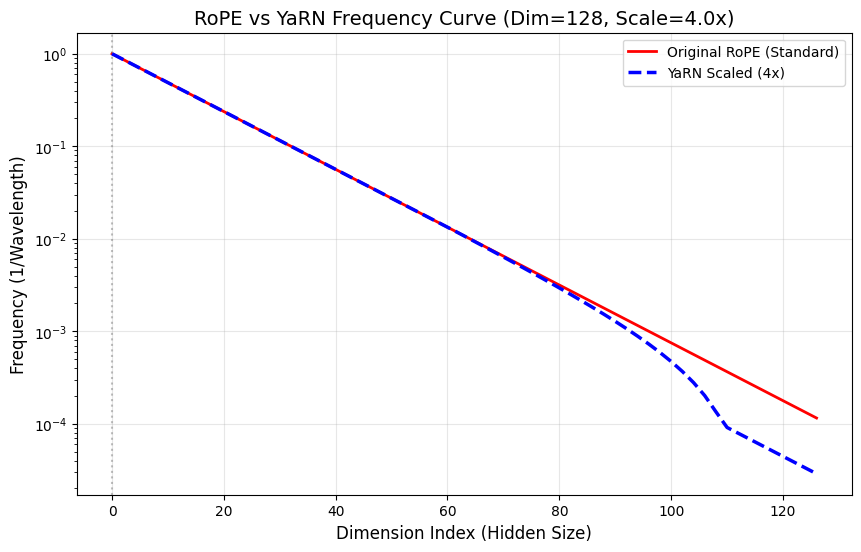

In [2]:
import torch
import math
import matplotlib.pyplot as plt

def plot_yarn_vs_rope():
    # --- 1. 设置参数 ---
    dim = 128          # 隐藏层维度 (为了看清楚，设小一点，实际是768或4096)
    base = 10000       # RoPE的基数
    scale = 4.0        # 我们要扩展4倍长度 (例如 512 -> 2048)
    original_max = 512 # 原始模型训练长度
    
    # YaRN 的阈值参数
    beta_fast = 32
    beta_slow = 1

    # --- 2. 计算原始 RoPE 频率 (Standard) ---
    # 维度索引: 0, 2, 4, ... 126
    indices = torch.arange(0, dim, 2).float()
    # 原始频率公式: 1 / 10000^(i/d)
    inv_freq_original = 1.0 / (base ** (indices / dim))

    # --- 3. 计算 YaRN 频率 ---
    # A. 插值频率 (全拉伸)
    inv_freq_interpolated = 1.0 / (scale * base ** (indices / dim))

    # B. 计算波长 (Wavelength) = 2pi / freq
    wavelen = 2 * math.pi / inv_freq_original

    # C. 计算 Ramp (混合比例)
    # 这里的逻辑：波长越长(低频)，ramp越接近1，越需要插值
    ramp = (wavelen / original_max - beta_slow) / (beta_fast - beta_slow)
    ramp = torch.clamp(ramp, 0.0, 1.0)

    # D. 混合 (Mix)
    # ramp=0 (高频细节) -> 用原始
    # ramp=1 (低频宏观) -> 用插值
    inv_freq_yarn = (1 - ramp) * inv_freq_original + ramp * inv_freq_interpolated

    # --- 4. 画图 ---
    plt.figure(figsize=(10, 6))
    
    # 画线
    plt.plot(indices.numpy(), inv_freq_original.numpy(), label='Original RoPE (Standard)', color='red', linewidth=2)
    plt.plot(indices.numpy(), inv_freq_yarn.numpy(), label='YaRN Scaled (4x)', color='blue', linestyle='--', linewidth=2.5)

    # 标注区域
    plt.axvline(x=0, color='gray', linestyle=':', alpha=0.5)
    
    # 装饰
    plt.title(f'RoPE vs YaRN Frequency Curve (Dim={dim}, Scale={scale}x)', fontsize=14)
    plt.xlabel('Dimension Index (Hidden Size)', fontsize=12)
    plt.ylabel('Frequency (1/Wavelength)', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 重点：为了看清"快速下降"和"尾部差异"，通常看对数坐标更清晰
    # 如果你想看直观的"滑梯"，可以注释掉下面这行
    plt.yscale('log') 
    
    plt.show()

# 运行
plot_yarn_vs_rope()